In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'GermanCredit.csv'
data = pd.read_csv(file_path)

# Encode the target variable 'Class'
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Split the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables using training data statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


8. **Calculating Contingency Reserve:**
    - Define a function to calculate the total financial impact for a given threshold.
    - Loop through a range of thresholds and compute the financial impact for each.

9. **Finding the Optimal Threshold:**
    - Identify the threshold that minimizes the total financial impact defined as the amount of the contingency reserve.

10. **Plotting the Results:**
    - Plot the financial impact versus the thresholds to visualize the optimal threshold.


In [54]:
# Train a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Define the threshold or leave the default one.
threshold = 0.6

# Predict the target variable based on the threshold. The line will change if you use the default value.
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(classification_report_str)
print(accuracy)

              precision    recall  f1-score   support

         Bad       0.63      0.71      0.67        59
        Good       0.87      0.82      0.85       141

    accuracy                           0.79       200
   macro avg       0.75      0.77      0.76       200
weighted avg       0.80      0.79      0.79       200

0.79


In [55]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8181


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[ 20  39]
 [  7 134]]


In [14]:
# Define the average loan amount
average_loan_amount = 1000

# Define the loss values based on the scenario provided
TN_Loss = 0  # No loss for True Negatives
FP_Loss = 0.2 * average_loan_amount  # 20% loss of the loan amount for False Positives
FN_Loss = 0  # No loss for False Negatives
TP_Loss = 0  # No loss for True Positives

# sklearn.metrics.confusion_matrix function reports the confusion matrix in the following format:
# [[TN, FP],
# [FN, TP]]
# you can put the values associated with the confusion matrix following the same lay out
value_matrix = np.array([
    [TN_Loss, FP_Loss],  
    [FN_Loss, TP_Loss]         
])

# and then to calculate the cost matrix, you can do an element wise multiplication
cost_matrix = conf_matrix * value_matrix
# you can sum all four quadrants for the cost_matrix to give the overal loss or profit: np.sum(cost_matrix)
overall_loss_or_profit = np.sum(cost_matrix)

# Display the results
print(conf_matrix)
print(cost_matrix)
print(overall_loss_or_profit)

[[ 20  39]
 [  7 134]]
[[   0. 7800.]
 [   0.    0.]]
7800.0


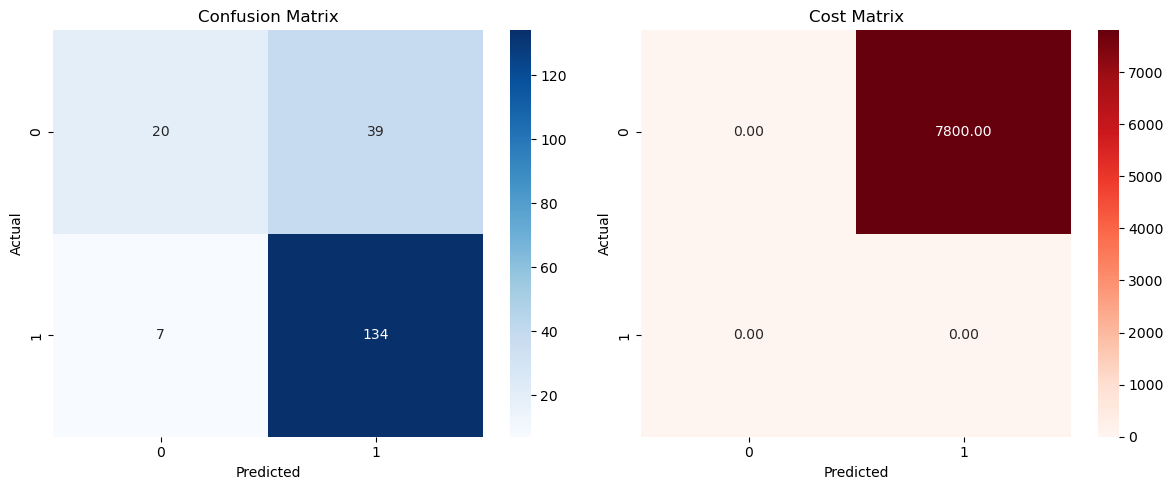

In [19]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot the cost matrix
plt.subplot(1, 2, 2)
sns.heatmap(cost_matrix, annot=True, fmt='.2f', cmap='Reds')
plt.title('Cost Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [20]:


def calculate_financial_impact(y_true, y_prob, threshold, value_matrix):
     # Predict the target variable based on the threshold
    y_pred = (y_prob >= threshold).astype(int)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate the cost matrix by element-wise multiplication
    cost_matrix = conf_matrix * value_matrix
    
    # Calculate the total financial impact
    total_impact = np.sum(cost_matrix)
    
    return total_impact


In [21]:
# Define the thresholds
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize variables to store the best threshold and its corresponding impact
best_threshold = None
min_impact = float('inf')

# Loop through the thresholds
for threshold in thresholds:
    impact = calculate_financial_impact(y_test, y_prob, threshold, value_matrix)
    if impact < min_impact:
        min_impact = impact
        best_threshold = threshold

best_threshold, min_impact

(0.9, 800.0)

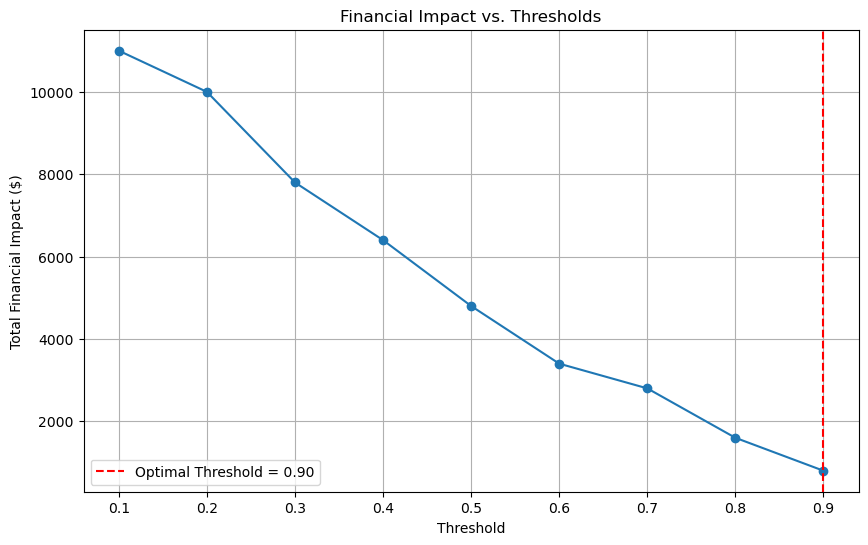

In [22]:
# Calculate financial impacts for each threshold
financial_impacts = []

for threshold in thresholds:
    impact = calculate_financial_impact(y_test, y_prob, threshold, value_matrix)
    financial_impacts.append(impact)

# Plot the financial impact versus thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, financial_impacts, marker='o', linestyle='-')
plt.title('Financial Impact vs. Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Total Financial Impact ($)')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {best_threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()

11. **Print the classification report and the confusion matrix** 
    - For the optimal threshold: Explain what do you see in terms of the elements of the confusion matrix and model performance metrics to minimize the overall contigency reserve.

In [25]:
#Your code here
# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.34      0.47        59
           1       0.77      0.95      0.85       141

    accuracy                           0.77       200
   macro avg       0.76      0.64      0.66       200
weighted avg       0.76      0.77      0.74       200

Confusion Matrix:
[[ 20  39]
 [  7 134]]


<h3>Number 11 Answer<h3>

True Negatives(TN) : At a threshold of 0.9, this value is likely to be high, as the model is very conservative in predicting loans as "Good."

False Positives(FP) : This is where the financial institution incurs a loss, as it granted a loan that wasn’t repaid. At the 0.9 threshold, the number of false positives should be minimized, which is crucial for reducing financial loss.

False Negatives (FN) : At a high threshold of 0.9, the model requires a high level of confidence before classifying a loan as "Good." As a result, some loans that are actually "Good", may be classified as "Bad." 

True Positives (TP) : At a threshold of 0.9, the number of true positives might be lower compared to lower thresholds, but the trade-off here is that the model is avoiding granting bad loans.

Minimizing the Contingency Reserve: By setting a high threshold (0.9), the model minimizes the number of false positives, which directly reduces the financial losses associated with granting bad loans. Although this might slightly reduce the number of loans classified as "Good" (reducing true positives and increasing false negatives), 
the overall financial impact is minimized, which is the goal when managing the contingency reserve.
This approach is particularly beneficial in scenarios where the cost of granting a bad loan (false positive)
is much higher than the opportunity cost of not granting a good loan (false negative). 
The conservative nature of the model at this threshold ensures that the bank is primarily protecting itself
from financial loss.

The product manager brings to the attention of the treasury that the overall profit is not maximized by this approach as it is short sighted. An opportunity cost is being left behind when you deny a credit to a good customer, and also giving a loan to a good customer also gives a profit, both factors are not considered in the overall initial calculation. Assume the profit is 5% of the loan, this will go towards a loan granted to a good customer and the loss opportunity of a loan denied to a good customer.

Task:
    
12. Recalculate the cost matrix defining the vaule of the four quadrants (a loan not granted to a customer who is going to default stays at \$0, to simplify things we are not considering loss avoidance) according to the new considerations and, using the same functions created above, recalculate the optimal threshold to maximize profit. Explain how the model is adjusted to this new loss structure. Would you change your threshold to maximize the overall profit? Is there a range of thresholds where the finanancial institution makes a profit and a range where it losses money?



One possible interpretation to the new cost matrix, signs can be the opposite, as far as it is consistent.

True Positives (TP): Positive, as they represent realized profit of correctly given loans.

True Negatives (TN): Zero or neutral, as there is no financial impact. Loan not given to a bad customer.

False Positives (FP): Negative, as they represent a financial loss. Loan given to a bad customer.

False Negatives (FN): Negative, as they represent an opportunity cost or missed profit. Loan not given to a 
good customer.

In [26]:
# your code here. You are re-running the model with a new value matrix.
# Redefine the loss values based on the new considerations
TP_Loss = 0.05 * average_loan_amount  # Profit from correctly granting a loan
TN_Loss = 0  # No financial impact for correctly not granting a loan
FP_Loss = -0.2 * average_loan_amount  # Financial loss from incorrectly granting a loan
FN_Loss = -0.05 * average_loan_amount  # Missed profit from incorrectly not granting a loan

# Create the new value matrix
new_value_matrix = np.array([
    [TN_Loss, FP_Loss],  
    [FN_Loss, TP_Loss]         
])

In [27]:
# Calculate the financial impacts for each threshold
new_financial_impacts = []

for threshold in thresholds:
    impact = calculate_financial_impact(y_test, y_prob, threshold, new_value_matrix)
    new_financial_impacts.append(impact)

# Find the new optimal threshold
new_best_threshold = thresholds[np.argmax(new_financial_impacts)]
max_profit = max(new_financial_impacts)

new_best_threshold, max_profit

(0.6, 1150.0)

<h3>Number 12 Answer<h3>

In the previous scenario, the threshold of 0.9 was optimal for minimizing financial losses by being conservative in granting loans. However, this resulted in more False Negatives, meaning the bank missed out on profitable loans.
In the new profit-focused scenario, the optimal threshold is likely to be lower than 0.9. A lower threshold increases the number of True Positives, thereby increasing profit, even though it might also increase False Positives.

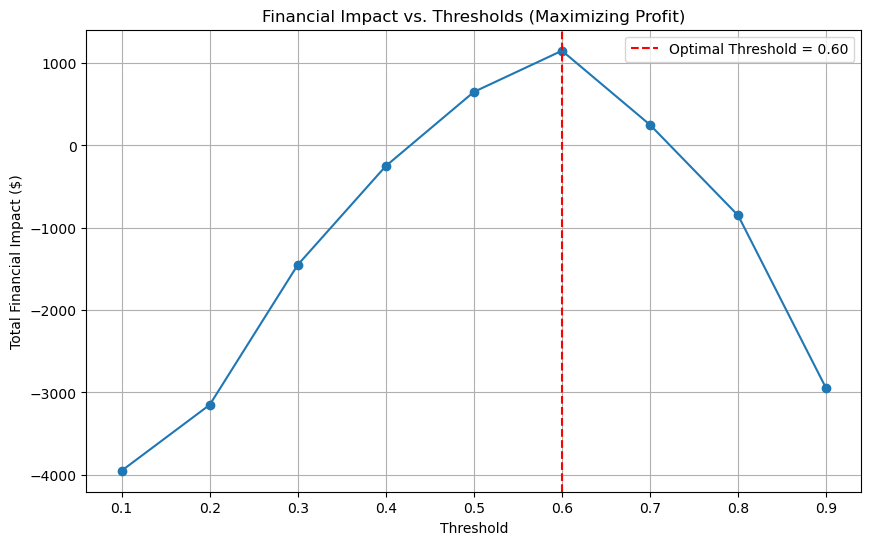

In [28]:
# Recalculate the financial impacts using the new value matrix
new_financial_impacts = []

for threshold in thresholds:
    impact = calculate_financial_impact(y_test, y_prob, threshold, new_value_matrix)
    new_financial_impacts.append(impact)

# Plot the financial impact versus thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, new_financial_impacts, marker='o', linestyle='-')
plt.title('Financial Impact vs. Thresholds (Maximizing Profit)')
plt.xlabel('Threshold')
plt.ylabel('Total Financial Impact ($)')
plt.axvline(x=new_best_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {new_best_threshold:.2f}')
plt.legend()
plt.grid(True)
plt.show()

The graph shows that the threshold of 0.6 is optimal to maximize profits. Moving away from this optimal threshold, either lower or higher, leads to financial losses due to the imbalance between the profits from good loans and the losses or missed opportunities associated with bad loans.

Management have heard that Machine Learning techiques can produce better results than the old logistic regression.

13. Try a few ML algorithms (at least 3 algorithms like Decision Tree, Random Forest, SVM, NN, remember to use Grid or Random search and CV) and see if you can beat the logistic regression.

Random forest with no CV and tuning did not improve.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier



Random Forest with CV and grid search.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# # Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# # Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4]             
}

# # Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# # Get the best estimator
best_rf_model = grid_search.best_estimator_

# # Predict probabilities on the test set
y_prob1 = best_rf_model.predict_proba(X_test_scaled)[:, 1]



In [50]:
threshold = 0.6
y_pred = (y_prob1 >= threshold).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(classification_report_str)
print(accuracy)

              precision    recall  f1-score   support

         Bad       0.61      0.71      0.66        59
        Good       0.87      0.81      0.84       141

    accuracy                           0.78       200
   macro avg       0.74      0.76      0.75       200
weighted avg       0.79      0.78      0.78       200

0.78


In [51]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob1)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8131


XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of boosting rounds
    'max_depth': [3, 5, 7],                      # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],           # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],                # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],         # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]                       # Minimum loss reduction required to make a further partition on a leaf node
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Predict probabilities on the test set
y_prob = best_xgb_model.predict_proba(X_test_scaled)[:, 1]


In [45]:
threshold = 0.6
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(classification_report_str)
print(accuracy)

              precision    recall  f1-score   support

         Bad       0.61      0.63      0.62        59
        Good       0.84      0.83      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.73      0.73       200
weighted avg       0.77      0.77      0.77       200

0.77


In [46]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7759


NN

In [40]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier

# # Define the MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=2000)

# # Define the hyperparameters grid to search
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],  
    'activation': ['tanh', 'relu'],                          
    'solver': ['adam', 'sgd'],                                
    'alpha': [0.0001, 0.001, 0.01],                           
    'learning_rate': ['constant', 'adaptive']                 
}

# # Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# # Get the best estimator
best_mlp_model = grid_search.best_estimator_

# # Predict probabilities on the test set
y_prob = best_mlp_model.predict_proba(X_test_scaled)[:, 1]

In [41]:
threshold = 0.6
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(classification_report_str)
print(accuracy)

              precision    recall  f1-score   support

         Bad       0.63      0.69      0.66        59
        Good       0.87      0.83      0.85       141

    accuracy                           0.79       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.80      0.79      0.79       200

0.79


In [43]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Print the AUC score
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8044


14. Write conclusions. What is the marginal increase of your best ML model? Are all models equally robust, that is, some may hae a narrow range of thresholds where they yield a profit, others a wide range? Which one would you chose? Is it worth?

<h3>Number 14 Answer<h3>

These are the model results:

Logistic model
- accuracy : 0.79
- AUC score : 0.8181

Random forest
- Accuracy : 0.78
- AUC score : 0.8131


XGBoost
- Accuracy : 0.77
- AUC score : 0.7759

Neural networks
- Accuracy : 0.79
- AUC score : 0.8044

Based on the results, Logistic Regression is the best model for this dataset, as it has the highest AUC score (0.8181), indicating better overall discrimination between classes. Logistic Regression is likely the best choice due to its robustness across thresholds, highest AUC score, and stable performance.
Given its stability and interpretability, along with a marginal improvement in performance, it is worth choosing Logistic Regression, especially if consistent decision-making is critical.

The models such as random forest,XGBoost and neural networks have a moderance to narrow range of thresholds due to their sensitivity to hyperparameters, overfitting and threshold chosed

#### your answer here.

# Question 2 (40%):

# Assignment: Customer Segmentation Using Unsupervised Learning

## Objective:
A common task in marketing is to classify customers based on their spending habits. This is an unsupervised exercise, as customers don't have a label on their foreheads :) with a classification for each company they interact with. You will be provided with a synthetic dataset, `diverse_synthetic_customer_segmentation_dataset.csv`, containing various features related to customer demographics, behavior, and preferences. The data is well-structured and designed to form distinguishable clusters. Segment customers into personas using K-means clustering to identify distinct customer segments.

The aim is to determine the optimal number of segments in which to classify customers and provide an interpretation of the clusters \ segments created. To that purpose, you will create a K-means model, perform clustering, and provide an interpretation of the identified customer personas. The data has more than two dimensions, so it cannot be visualized easily. In this exercise, we will create an approximated visualization using principal components. The first two principal components can be used to visualize the clusters.


## Features in the Dataset:
1. **CustomerID**: Unique identifier for each customer.
2. **Age**: Age of the customer.
3. **Gender**: Gender of the customer (0: Male, 1: Female, 2: Other).
4. **Annual Income (k$)**: Annual income of the customer in thousands.
5. **Spending Score (1-100)**: A score assigned based on customer behavior and spending nature.
6. **Tenure**: Number of years the customer has been with the company.
7. **Purchase Frequency**: Number of purchases made by the customer in the last year.
8. **Average Transaction Value**: Average value of transactions made by the customer.
9. **Product Category Preference**: Preferred category of products (0: Electronics, 1: Clothing, 2: Groceries).
10. **Online Activity**: Number of online interactions (e.g., website visits, social media interactions).

## Tasks:
1. **Data Preprocessing**:
   - Load the dataset and inspect its structure.
   - Handle missing values and any infinite values if any.
   - Convert categorical features to numerical values if necessary (encode).
   - Standardize the features to ensure each feature contributes equally to the clustering.

2. **K-means Clustering**:
   - Apply the K-means clustering algorithm to segment the customers into an initial set of clusters.

3. **Determine the Optimal Number of Clusters**:
   - Use the Elbow Method to identify the optimal number of clusters.
   - Calculate and plot the Silhouette Score for different numbers of clusters.
   - Decide on the optimal number of clusters based on the evaluation metrics.
   - Re-run the K-means clustering with the optimal number of clusters.
   
4. **PCA and Clustering Visualization**:
   - Perform Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.
   - Visualize the clusters in the reduced PCA space using the first two principal components to visually evaluate the clustering quality.

5. **Interpretation of Clusters**:
   - Analyze the cluster centers to understand the characteristics of each customer segment.
   - Assign cluster labels to the customers in the dataset.
   - Provide a detailed interpretation of the identified personas, describing key features that distinguish each cluster.

6. **Report**:
   - Prepare a report summarizing your findings. Include the following sections:
     - **Data Preprocessing**: Explain the steps taken to clean and preprocess the data.
     - **PCA Visualization**: Show the PCA 2D plot and discuss the clustering results in the reduced space. Did K-means did a good job?
     - **Cluster Interpretation**: Provide a detailed interpretation of each identified persona.
## Submission:
- Submit your code, plots, and report in a Jupyter Notebook printed as a PDF document.
- Ensure your code is well-commented and your report is well-structured and clear.

## Grading Criteria:
- **Data Preprocessing (10%)**: Quality of data cleaning, handling missing values, and feature standardization.
- **Optimal Clusters Determination (40%)**: Correct application of the K-means algorithm and accurate clustering results. Appropriate use of evaluation metrics and justification for the chosen number of clusters.
- **PCA Visualization (10%)**: Effective use of PCA for visualization and clear presentation of the clusters.
- **Cluster Interpretation (40%)**: Comprehensive and insightful interpretation of the identified personas.

Good luck, and happy clustering!


I will use PCA to visualize. Clusters on scaled data.
kmeans.fit(scaled_data)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# # Load the dataset
file_path = 'diverse_synthetic_customer_segmentation_dataset.csv'
data = pd.read_csv(file_path)

# Checking for missing and infinite values in the dataset
missing_values = data.isnull().sum()
infinite_values = data.isin([float('inf'), float('-inf')]).sum()

# Print missing and infinite values
print("Missing values:\n", missing_values)
print("Infinite values:\n", infinite_values)

# Dropping the CustomerID column
data_features = data.drop(columns=['CustomerID'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_features)

# Converting the scaled features back to a DataFrame for clarity
scaled_data = pd.DataFrame(scaled_features, columns=data_features.columns)

# # Apply PCA for visualization purposes
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Missing values:
 CustomerID                     0
Age                            0
Gender                         0
Annual Income (k$)             0
Spending Score (1-100)         0
Tenure                         0
Purchase Frequency             0
Average Transaction Value      0
Product Category Preference    0
Online Activity                0
dtype: int64
Infinite values:
 CustomerID                     0
Age                            0
Gender                         0
Annual Income (k$)             0
Spending Score (1-100)         0
Tenure                         0
Purchase Frequency             0
Average Transaction Value      0
Product Category Preference    0
Online Activity                0
dtype: int64


In [2]:
# Assuming the elbow method suggests k=4 (for example)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

# Adding the cluster labels to the original scaled data
scaled_data['Cluster'] = clusters

# Show the first few rows of the data with cluster assignments
print(scaled_data.head())

/Users/sopulu-onyibe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


        Age    Gender  Annual Income (k$)  Spending Score (1-100)    Tenure  \
0 -1.106283 -1.414214           -1.290068                1.663793 -0.733217   
1 -0.942801 -1.414214           -1.453896                1.605647 -1.375827   
2 -1.841952 -1.414214           -1.494853                0.733455 -1.375827   
3 -1.351506 -1.414214           -1.208153                0.500871 -1.697131   
4 -1.514988 -1.414214           -1.371982                0.966040 -0.733217   

   Purchase Frequency  Average Transaction Value  Product Category Preference  \
0            0.945788                  -1.233539                    -0.904534   
1            0.805296                  -1.075004                    -0.904534   
2            0.383822                  -1.623273                    -0.904534   
3            1.226770                  -1.537399                    -0.904534   
4            1.086279                  -1.504371                    -0.904534   

   Online Activity  Cluster  
0       

In [3]:
# Converting the scaled features back to a DataFrame for clarity
scaled_data = pd.DataFrame(scaled_features, columns=data_features.columns)

In [ ]:
from sklearn.metrics import silhouette_score
# Elbow Method to determine the optimal number of clusters
sse = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
    # Calculate the silhouette score for each k
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

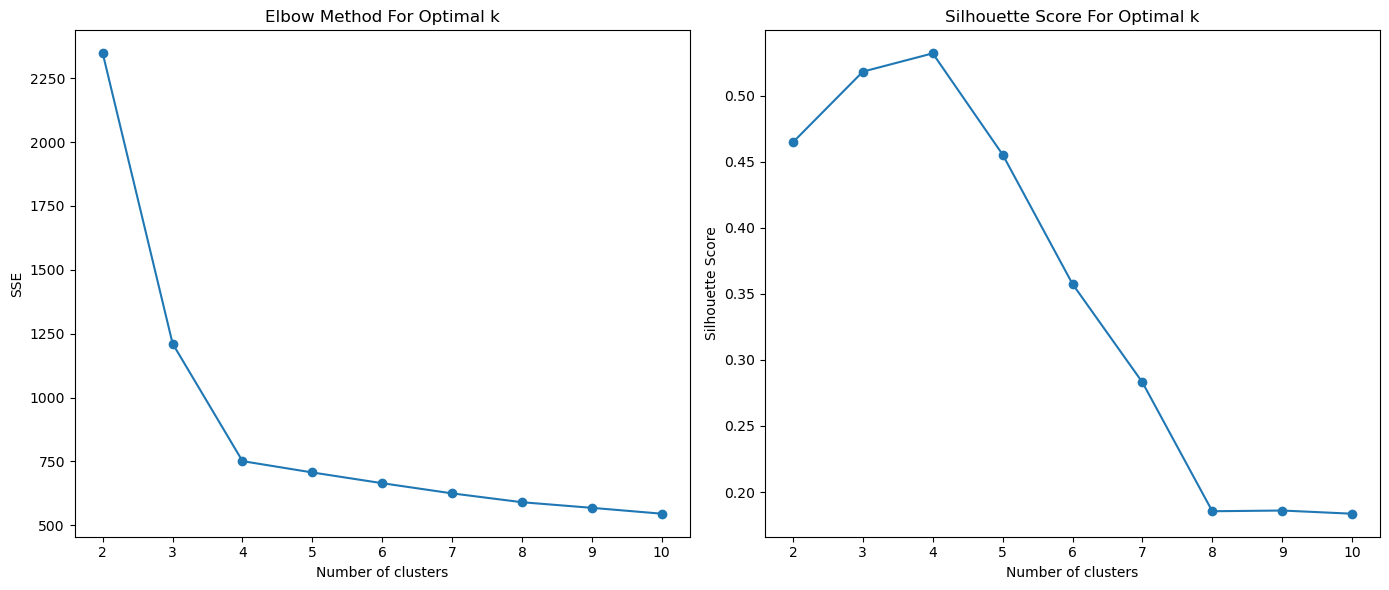

In [6]:
# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Your cluster segment / interpretation here.

In [7]:
# Determine the optimal number of clusters based on the Silhouette score (highest value)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Re-run the K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(scaled_data)
optimal_clusters = kmeans_optimal.predict(scaled_data)

Optimal number of clusters: 4


/Users/sopulu-onyibe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# Adding the optimal cluster labels to the original scaled data
scaled_data['Optimal Cluster'] = optimal_clusters

# Show the first few rows of the data with the optimal cluster assignments
print(scaled_data.head())

        Age    Gender  Annual Income (k$)  Spending Score (1-100)    Tenure  \
0 -1.106283 -1.414214           -1.290068                1.663793 -0.733217   
1 -0.942801 -1.414214           -1.453896                1.605647 -1.375827   
2 -1.841952 -1.414214           -1.494853                0.733455 -1.375827   
3 -1.351506 -1.414214           -1.208153                0.500871 -1.697131   
4 -1.514988 -1.414214           -1.371982                0.966040 -0.733217   

   Purchase Frequency  Average Transaction Value  Product Category Preference  \
0            0.945788                  -1.233539                    -0.904534   
1            0.805296                  -1.075004                    -0.904534   
2            0.383822                  -1.623273                    -0.904534   
3            1.226770                  -1.537399                    -0.904534   
4            1.086279                  -1.504371                    -0.904534   

   Online Activity  Optimal Cluster  


In [9]:
# Perform PCA to reduce the dimensionality of the dataset to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data.drop(columns=['Optimal Cluster']))

# Convert the PCA results to a DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = scaled_data['Optimal Cluster']

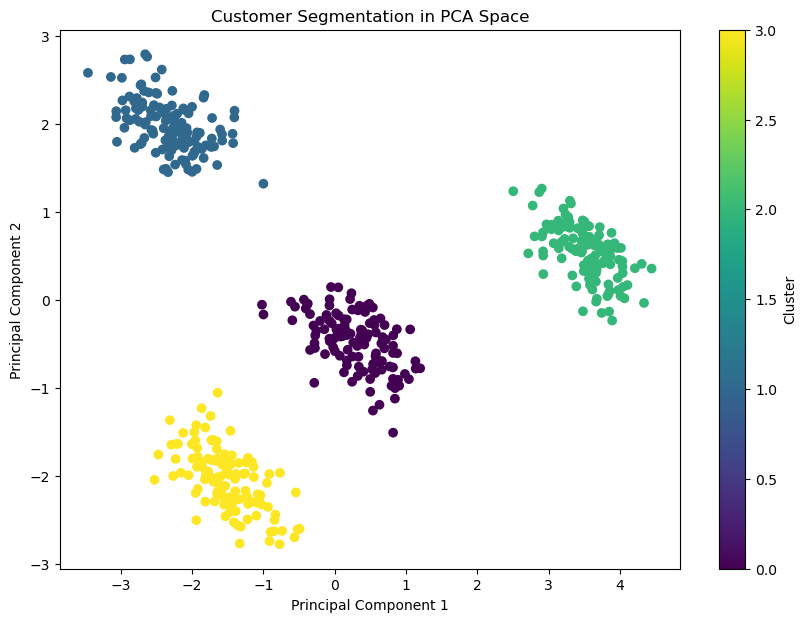

In [10]:
# Visualize the clusters in the reduced PCA space
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
# Analyze the cluster centers to understand the characteristics of each customer segment
cluster_centers = scaler.inverse_transform(kmeans_optimal.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data_features.columns)

In [12]:
# Assigning cluster labels to the original dataset
data['Cluster'] = optimal_clusters

# Displaying the cluster centers
print(cluster_centers_df)

      Age        Gender  Annual Income (k$)  Spending Score (1-100)  Tenure  \
0  35.856  1.000000e+00              49.880                  50.928   5.224   
1  55.712  1.000000e+00              90.432                  40.696   9.864   
2  25.432 -1.332268e-15              31.008                  78.688   2.056   
3  45.136  2.000000e+00              70.672                  59.232   7.984   

   Purchase Frequency  Average Transaction Value  Product Category Preference  \
0              15.136                    204.144                 1.000000e+00   
1              10.232                    491.816                 2.442491e-15   
2              24.080                    101.488                 2.442491e-15   
3              19.624                    301.512                 2.000000e+00   

   Online Activity  
0           51.152  
1           69.704  
2           89.320  
3           30.240  


1. Gen Z high spenders

Age: 25 years

Gender: Primarily male

Annual Income: $31,000

Spending Score: High (79)

Tenure: 2 years

Purchase Frequency: 24 times

Average Transaction Value: $101

Product Category Preference: Neutral (no strong preference for a specific category)

Online Activity: High (89)

This segment consists of younger customers who tend to spend a lot, shop frequently, and are highly active online. The are primarily male, their income is relatively low but they have a high spending score.

2. Millenial selective high_income spenders

Age: 36 years

Gender: Female

Annual Income: $50,000

Spending Score: Medium (51)

Tenure: 5 years

Purchase Frequency: 15 times

Average Transaction Value: $204

Product Category Preference: Strong preference for one category

Online Activity: Moderate (51)

This segment includes middle-aged customers with higher incomes who make fewer but larger purchases. They have a strong preference for a particular product category and moderate online activity. 

3. Gen X moderate spenders

Age: 45 years

Gender: Mixed

Annual Income: $71,000

Spending Score: Medium (59)

Tenure: 8 years

Purchase Frequency: 20 times

Average Transaction Value: $302

Product Category Preference: Strong preference for a specific category

Online Activity: Low (30)

This group includes middle-aged customers with moderate incomes who spend moderately frequently with relatively large transaction sizes. They have a strong preference for one category and are less active online. 

4. Baby boomer wealthy infrequent spenders

Age: 56 years

Gender: Female

Annual Income: $90,000

Spending Score: Low (41)

Tenure: 10 years

Purchase Frequency: 10 times

Average Transaction Value: $492

Product Category Preference: Neutral

Online Activity: Moderate (70)

This segment consists of older customers (~56 years old) with high incomes who spend less frequently but make large transactions when they do. They have been with the company for a long time and show moderate online activity. 